In [3]:
from eegProcess import *
from PyEMD import EMD

In [4]:
SECOND = 125
WINDOW_SIZE = 5*SECOND
ep = EEGProcess('0-data/org/', SECOND, WINDOW_SIZE)

Total 24 files :  ['0-data/org/case18.mat', '0-data/org/case24.mat', '0-data/org/case19.mat', '0-data/org/case21.mat', '0-data/org/case20.mat', '0-data/org/case22.mat', '0-data/org/case23.mat', '0-data/org/case8.mat', '0-data/org/case9.mat', '0-data/org/case2.mat', '0-data/org/case3.mat', '0-data/org/case1.mat', '0-data/org/case4.mat', '0-data/org/case5.mat', '0-data/org/case7.mat', '0-data/org/case6.mat', '0-data/org/case12.mat', '0-data/org/case13.mat', '0-data/org/case11.mat', '0-data/org/case10.mat', '0-data/org/case14.mat', '0-data/org/case15.mat', '0-data/org/case17.mat', '0-data/org/case16.mat']


In [5]:
xset, yset, idx = ep.process(3)

/Users/nibey/Desktop/WorkSpace/kBRI/doA_eeg/eegProcess.py:44: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filepath)


=== 0-data/org/case18.mat === :  760
0
200
400
600
(759, 3, 625) (759,)
=== 0-data/org/case24.mat === :  775
0
200
400
600
(774, 3, 625) (774,)
=== 0-data/org/case19.mat === :  906
0
200
400
600
800
(905, 3, 625) (905,)
Final output: (2438, 3, 625) (2438,) (2438,)


In [6]:
eeg, bis, idx = ep.get_data(ep.file_list[2])
eeg.shape, bis.shape, idx

((557440,), (906,), 19)

In [8]:
r, need_len = ep.get_data_lenth(eeg, bis)
r, need_len

(615, 556585)

In [9]:
eeg_cut = ep.cut_eeg(eeg, bis, need_len)
eeg_cut.shape

(556585,)

In [10]:
eeg_sp, bis_sp = ep.split_eeg(eeg_cut, bis, r)
eeg_sp.shape, bis_sp.shape

((905, 625), (905,))

In [11]:
eeg_filterd = ep.filter_eegs(eeg_sp)
eeg_filterd.shape

(905, 625)

In [12]:
imfs = ep.get_imf(eeg_filterd)
imfs.shape

0
200
400
600
800


(905, 3, 625)

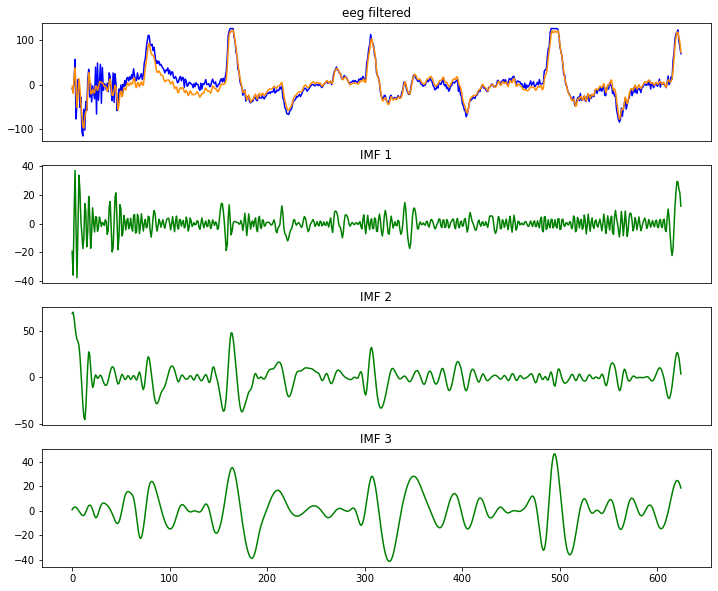

In [15]:
draw_process_results(eeg_sp[0], eeg_filterd[0], imfs[0])

In [14]:
def draw_process_results(eeg_sp, eeg_filtered, imfs):
    imf0, imf1, imf2 = imfs[0,:], imfs[1,:], imfs[2,:]

    plt.figure(figsize=(12,10))
    plt.subplot(4,1,1)
    plt.xticks([])
    plt.title('eeg filtered')
    plt.plot(eeg_sp, color='blue')
    plt.plot(eeg_filtered, color='darkorange')

    plt.subplot(4,1,2)
    plt.xticks([])
    plt.title('IMF 1')
    plt.plot(imf0, color='green')

    plt.subplot(4,1,3)
    plt.xticks([])
    plt.title('IMF 2')
    plt.plot(imf1, color='green')

    plt.subplot(4,1,4)
    plt.title('IMF 3')
    plt.plot(imf2, color='green')
    plt.show()

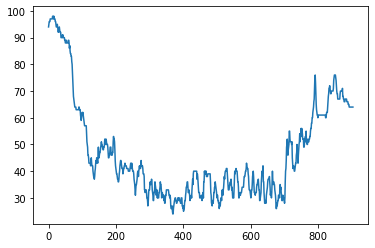

In [16]:
plt.plot(bis_sp)

In [17]:
def draw_specgram(eeg_list):
    figure = plt.figure(figsize=(15,3))
    n = len(eeg_list)
    for i, eeg in enumerate(eeg_list):
        plt.subplot(1,n,i+1)
        plt.specgram(eeg)
        
    plt.show()



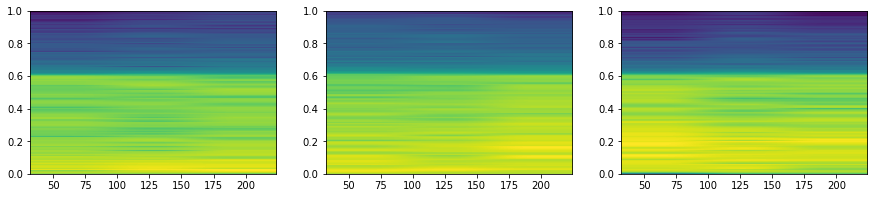

In [18]:
draw_specgram([eeg_filterd[3], eeg_filterd[300], eeg_filterd[800]])

In [19]:
imf2=imfs[:,1,:]
imf2.shape

(905, 625)

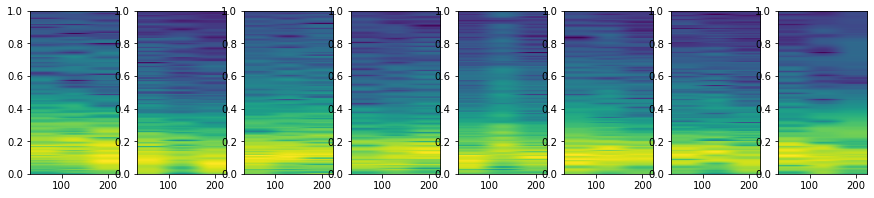

In [20]:
draw_specgram([imf2[3],imf2[5], imf2[10], imf2[200], imf2[300], imf2[400], imf2[500], imf2[800]])